# Machine Learning - Exercise 4
This exercise focuses on application of clustering techniques on the selected dataset from the Kaggle or UCI repository. Students will apply different clustering algorithms, compare their results, and visualize the clustering structure using scatter plots.



* 💡 **Agglomerative clustering** is a **bottom-up approach** to clustering.
    * We first divide **each instance into its own cluster** and **merge them into couples** based on a similarity metric.
    * Subsequently we compute the **similarity** again and **merge the couples into bigger groups** (clusters).
    * These groups are then merged into the bigger ones **till there is only a one big group containing all the instances present at the top**.
    * https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
* 💡 **K-means** is a **partitioning approach** to clustering.
    * We **first choose the number of clusters K** and **initialize K centroids** (often at random).
    * Repeatedly **assign each point to its nearest centroid** (by a distance like Euclidean).
    * Then **recompute each centroid** as the mean of the points assigned to it.
    * **Iterate assignment** → update until centroids stop moving (or a max number of steps is reached).
    * https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* 💡 **DBSCAN** is a **density-based approach** to clustering.
    * We set **ε (eps) for neighborhood radius** and **min_samples for the minimum points** to form dense regions.
    * **Points with ≥ min_samples** neighbors **within ε are core points,** neighbors of cores are **border points**, others are **noise/outliers**.
    * **Start from a core point and expand** by connecting nearby cores/borders to **grow a cluster**.
    * **Repeat** until all points are visited—yielding clusters of arbitrary shapes and identifying outliers naturally.
    * https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

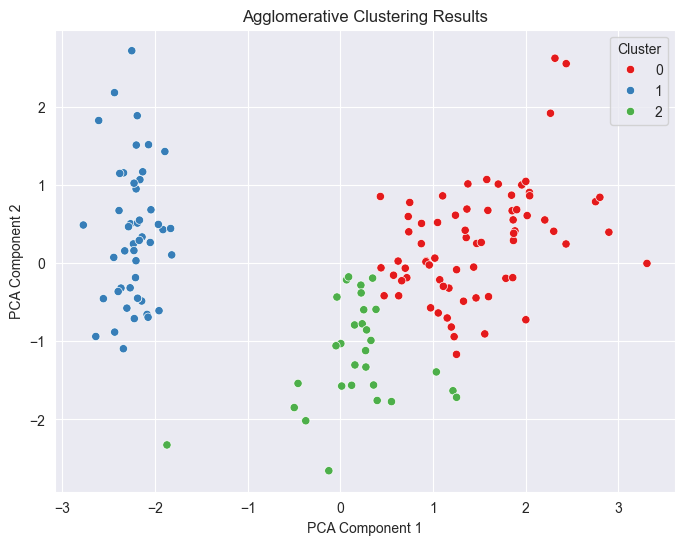

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, palette='Set1')
plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


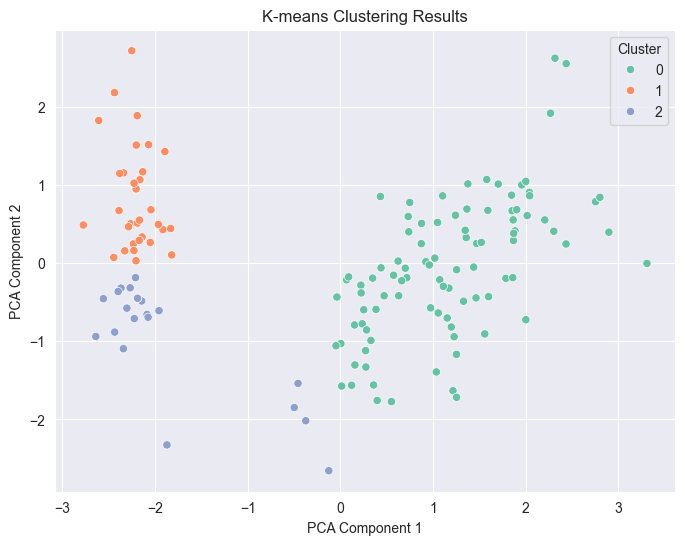

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2')
plt.title('K-means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

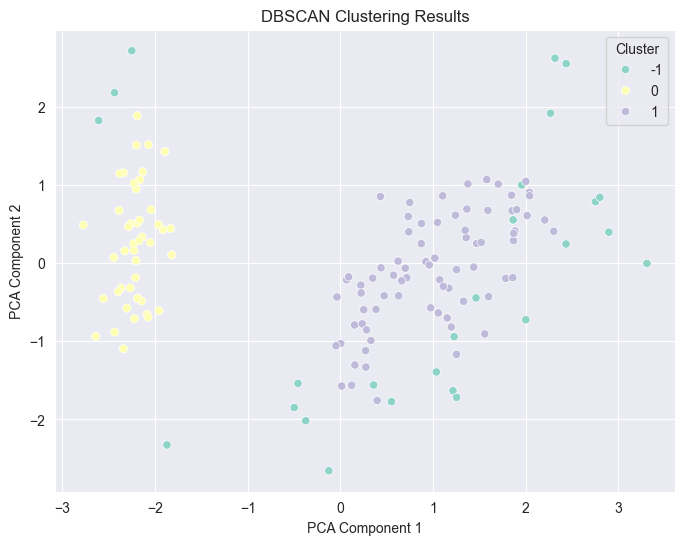

In [5]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='Set3')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()